In [4]:
# Load example subjects

import pickle
import numpy as np

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/BSNIP/'
demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))
fc = []
age = []

for sub in demo['Age_cal']:
    fc.append(np.load(f'{demodir}/fc/{sub}_task-unk_fc.npy'))
    age.append(demo['Age_cal'][sub])
    
fc = np.stack(fc)
age = np.array(age)
print(fc.shape, age.shape)

(1244, 34716) (1244,)


In [25]:
# Jitter Only

import matplotlib.pyplot as plt

def mat2vec(mat):
    a,b = np.triu_indices(264,1)
    return mat[:,a,b]

a,b = np.triu_indices(264,1)
X = np.ones((fc.shape[0],264,264))
X[:,a,b] = fc
X[:,b,a] = fc
w, v = np.linalg.eig(X)
print('Done eigs')

w[:,1:] = 0
aps20 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps20 = mat2vec(aps20)
res20 = fc-aps20
print('Done 20')

raise 'bad'

w[:,15:] = 0
aps15 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps15 = mat2vec(aps15)
print('Done 15')

w[:,10:] = 0
aps10 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps10 = mat2vec(aps10)
print('Done 10')

w[:,5:] = 0
aps5 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps5 = mat2vec(aps5)
print('Done 5')

w[:,3:] = 0
aps3 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps3 = mat2vec(aps3)
print('Done 3')

w[:,1:] = 0
aps1 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps1 = mat2vec(aps1)
print('Done 1')

w = None
v = None
X = None

Done eigs
Done 20


TypeError: exceptions must derive from BaseException

In [26]:
# Try prediction

def rmse(yhat, y):
    return np.mean((yhat-y)**2)**0.5

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

xtr, xt, xtr0, xt0, xtr1, xt1, ytr, yt = train_test_split(fc, aps20, res20, age, train_size=0.5)

reg = Ridge(alpha=1).fit(xtr, ytr)
yhat = reg.predict(xt)
print(rmse(yt, yhat))

reg = Ridge(alpha=1).fit(xtr0, ytr)
yhat = reg.predict(xt0)
print(rmse(yt, yhat))

reg = Ridge(alpha=1).fit(xtr1, ytr)
yhat = reg.predict(xt1)
print(rmse(yt, yhat))

print(rmse(yt, np.mean(ytr)))

/usr/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


10.504136810098554


/usr/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


17.10460354115073
10.436146769330557
13.759979051604118


/usr/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [27]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [99]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

def mixup(xlow, xhigh):
    low = xlow.shape[0]
    high = xhigh.shape[0]
    X = torch.zeros(low*high, 34716).float().cuda()
    E = torch.zeros(low*high, low*high).float().cuda()
    for i in range(low):
        i0 = i*high
        i1 = (i+1)*high
        X[i0:i1] = xlow[i].unsqueeze(0)+xhigh
        for j in range(i0,i1):
            E[j,i0:i1] = 1
    return X, E

class CL(nn.Module):
    def __init__(self):
        super(CL, self).__init__()
        self.A = nn.Parameter(0.01*torch.randn(34716,10).float().cuda())
        self.b = nn.Parameter(0.1*torch.randn(34716).float().cuda())
    
    def sim(self, x, n):
        x = (x-self.b.unsqueeze(0))@self.A
        E = x@x.T
        E = n*F.softmax(E, dim=0)
        return E

cl = CL()
optim = torch.optim.Adam(cl.parameters(), lr=1e-4, weight_decay=1e-4)

nepochs = 5
pperiod = 50

for b in range(200):
    idcs = np.random.permutation(aps20.shape[0])
    idcs = idcs[:60]
    
    low = torch.from_numpy(aps20[idcs]).float().cuda()
    high = torch.from_numpy(res20[idcs]).float().cuda()
    X, E = mixup(low, high)
#     print(X.shape)
#     print(E.shape)

    for e in range(nepochs):
        optim.zero_grad()
        Ehat = cl.sim(X, 60)
        Ehat = (Ehat+Ehat.T)/2
        loss = torch.mean((E-Ehat)**2)**0.5
        loss.backward()
        optim.step()
        if e % pperiod == 0 or e == nepochs-1:
            print(f'{e} {float(loss)}')

0 0.1357763111591339
4 0.12555815279483795
0 0.12563635408878326
4 0.12500174343585968
0 0.12433090806007385
4 0.12380657345056534
0 0.1256972849369049
4 0.1232680231332779
0 0.12658125162124634
4 0.12344399094581604
0 0.12394671887159348
4 0.12218131870031357
0 0.12183675915002823
4 0.119656503200531
0 0.12778818607330322
4 0.12304065376520157
0 0.1437513530254364
4 0.12722422182559967
0 0.12262915819883347
4 0.12073666602373123
0 0.12321281433105469
4 0.12120138853788376
0 0.13164199888706207
4 0.120078906416893
0 0.12117404490709305
4 0.11888765543699265
0 0.1214236170053482
4 0.11964824795722961
0 0.12318796664476395
4 0.11965826153755188
0 0.12176507711410522
4 0.11614392697811127
0 0.1208595335483551
4 0.11601866036653519
0 0.14615309238433838
4 0.12595833837985992
0 0.12684288620948792
4 0.12017232924699783
0 0.1310560554265976
4 0.11628194898366928
0 0.12334457039833069
4 0.11764951795339584
0 0.1427195817232132
4 0.1230185404419899
0 0.11994373798370361
4 0.11426261812448502
0

0 0.11989530920982361
4 0.09862697124481201
0 0.09890352189540863
4 0.08670075982809067
0 0.09357959032058716
4 0.0848381444811821
0 0.09450987726449966
4 0.08693443238735199
0 0.11589397490024567
4 0.08973352611064911
0 0.09751737117767334
4 0.08633296936750412
0 0.08849405497312546
4 0.08554685115814209
0 0.09324003756046295
4 0.08235786110162735
0 0.0941077396273613
4 0.0890139564871788
0 0.0860503762960434
4 0.07830572128295898
0 0.11880260705947876
4 0.09568808227777481
0 0.15490280091762543
4 0.10463115572929382


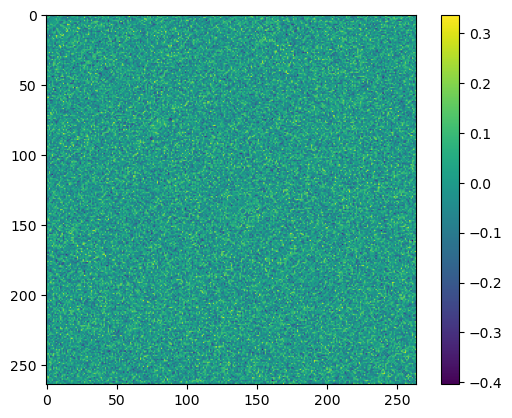

In [104]:
# plt.imshow(vec2mat(fc[0]))
# plt.imshow(vec2mat(X[3].detach().cpu().numpy()))
# plt.imshow(vec2mat(low[1].detach().cpu().numpy()))
# plt.imshow(vec2mat(high[0].detach().cpu().numpy()))
plt.imshow(vec2mat(cl.b.detach().cpu().numpy()))
plt.colorbar()
plt.show()

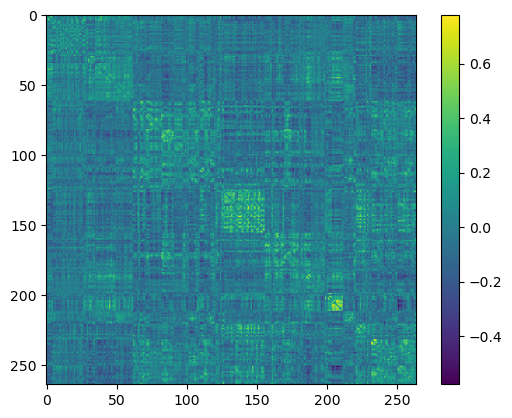

In [43]:
import matplotlib.pyplot as plt

plt.imshow(remap(vec2mat(res20[13])))
plt.colorbar()
plt.show()